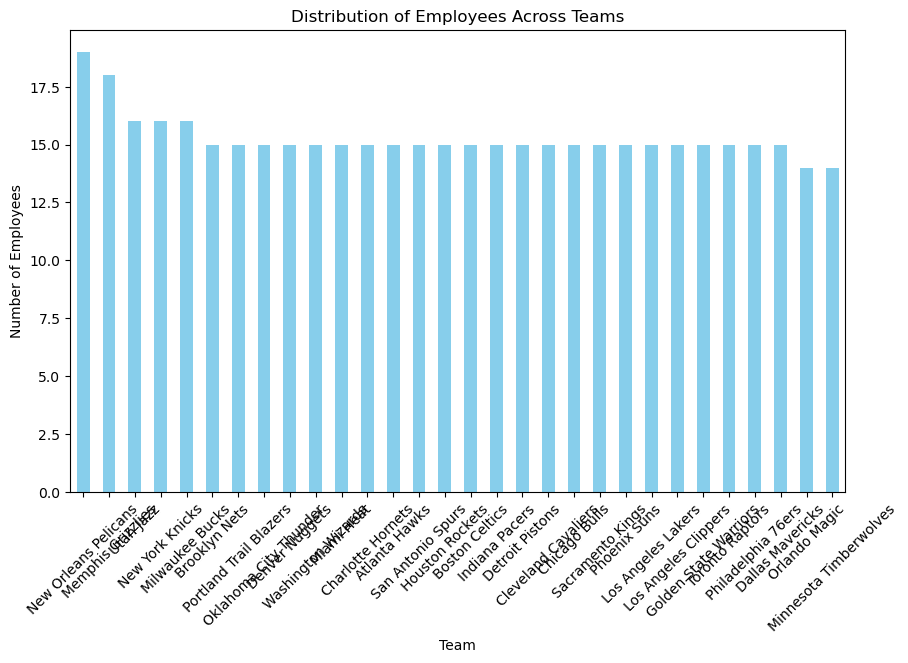

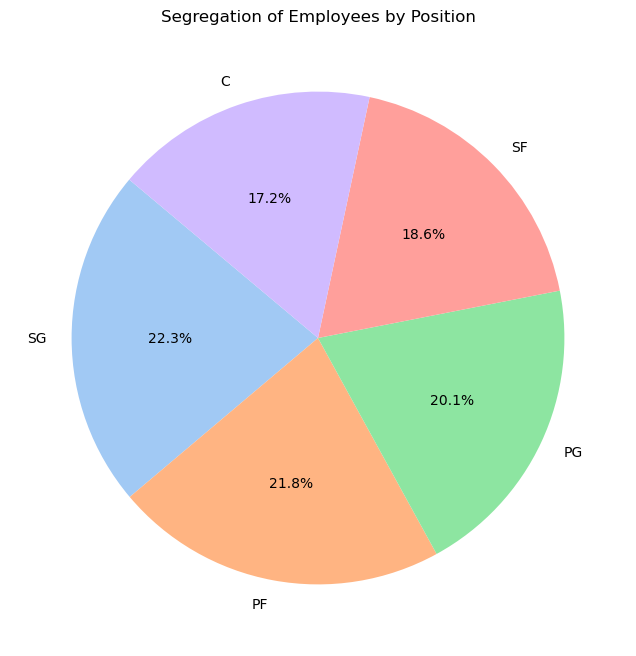

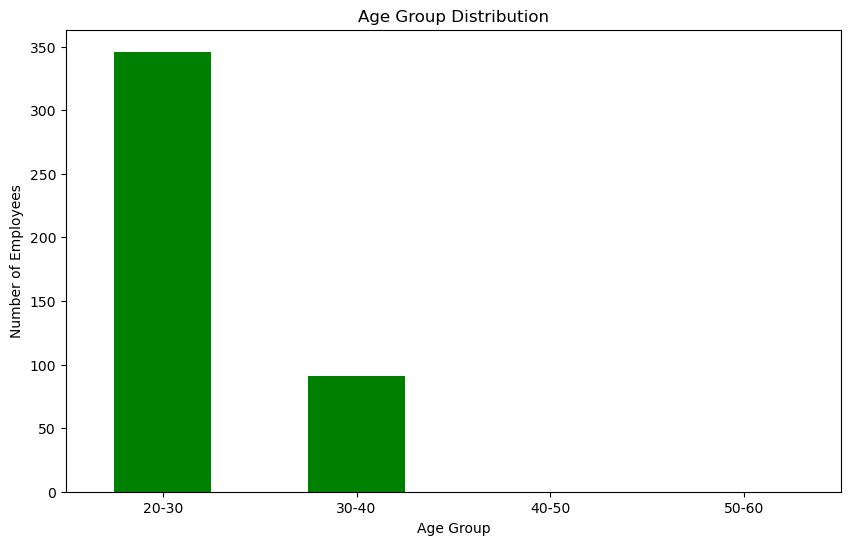

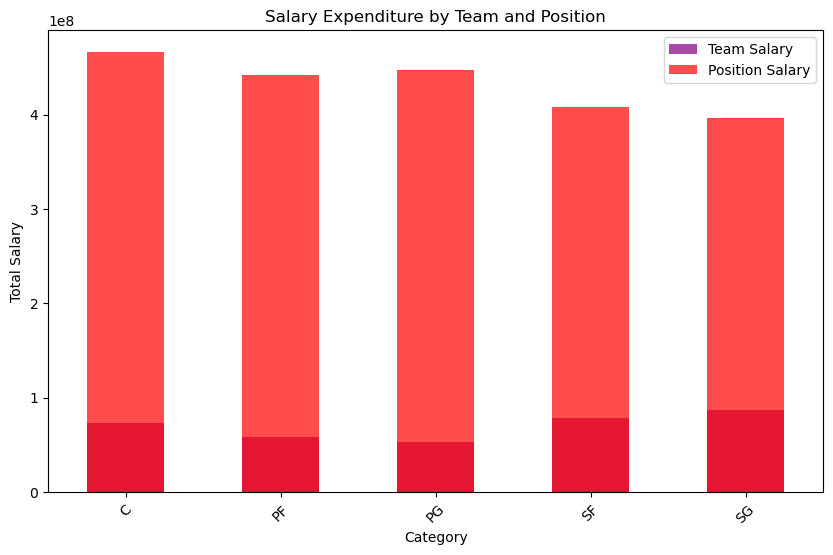

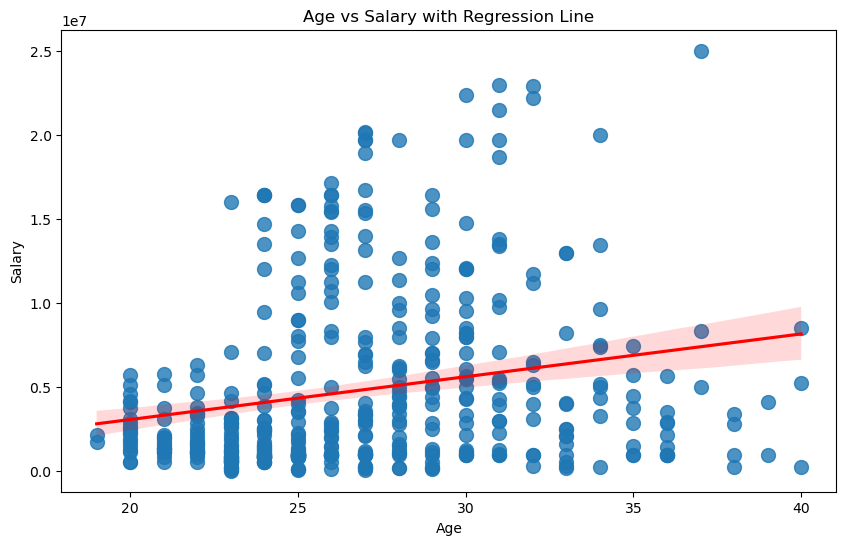


### Data Story: Insights ###

1. The majority of employees are in the 'New Orleans Pelicans' team, comprising 4.15% of the workforce.
2. The most common position is 'SG' with 102 employees.
3. The predominant age group is '20-30' with 346 employees.
4. The team with the highest salary expenditure is 'Cleveland Cavaliers' with a total of 106988689.0 salary units.
   The position with the highest salary expenditure is 'C' with a total of 466377332.0 salary units.
5. Correlation between age and salary: 0.21. This indicates a weak relationship.


In [7]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = r"C:\Users\neeth\Downloads\myexcel (1).xlsx"  # Update with the correct file path
data = pd.read_excel(file_path)

# Ensure necessary columns exist in the dataset
required_columns = ['Team', 'Position', 'Age', 'Salary', 'Height']
for col in required_columns:
    if col not in data.columns:
        raise ValueError(f"Missing column: {col}")

# Preprocessing: Replace 'Height' with random values (150-180)
import numpy as np
data['Height'] = np.random.randint(150, 181, size=len(data))

# Task 1: Distribution of employees across each team
team_distribution = data['Team'].value_counts()
team_distribution_percentage = (team_distribution / team_distribution.sum()) * 100

# Visualization for Task 1
plt.figure(figsize=(10, 6))
team_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Employees Across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

# Segregation of employees by position
position_distribution = data['Position'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
position_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Segregation of Employees by Position')
plt.ylabel('')  # Hide the y-axis label
plt.show()


# Task 3: Predominant age group
bins = [20, 30, 40, 50, 60]
labels = ['20-30', '30-40', '40-50', '50-60']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)
age_group_distribution = data['Age Group'].value_counts()

# Visualization for Task 3
plt.figure(figsize=(10, 6))
age_group_distribution.plot(kind='bar', color='green')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.show()

# Task 4: Team and position with the highest salary expenditure
team_salary = data.groupby('Team')['Salary'].sum()
position_salary = data.groupby('Position')['Salary'].sum()

# Visualization for Task 4
plt.figure(figsize=(10, 6))
team_salary.plot(kind='bar', color='purple', alpha=0.7, label='Team Salary')
position_salary.plot(kind='bar', color='red', alpha=0.7, label='Position Salary')
plt.title('Salary Expenditure by Team and Position')
plt.xlabel('Category')
plt.ylabel('Total Salary')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Task 5: Correlation between age and salary
correlation = data[['Age', 'Salary']].corr()

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Salary', data=data, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title('Age vs Salary with Regression Line')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

# Data Story: Insights
print("\n### Data Story: Insights ###\n")
print(f"1. The majority of employees are in the '{team_distribution.idxmax()}' team, comprising {team_distribution_percentage[team_distribution.idxmax()]:.2f}% of the workforce.")
print(f"2. The most common position is '{position_distribution.idxmax()}' with {position_distribution.max()} employees.")
print(f"3. The predominant age group is '{age_group_distribution.idxmax()}' with {age_group_distribution.max()} employees.")
print(f"4. The team with the highest salary expenditure is '{team_salary.idxmax()}' with a total of {team_salary.max()} salary units.")
print(f"   The position with the highest salary expenditure is '{position_salary.idxmax()}' with a total of {position_salary.max()} salary units.")
print(f"5. Correlation between age and salary: {correlation.loc['Age', 'Salary']:.2f}. This indicates a {'weak' if abs(correlation.loc['Age', 'Salary']) < 0.3 else 'strong'} relationship.")

# Save processed data and insights
data.to_excel("processed_data.xlsx", index=False)
